### Module 5: Decision Tree Regression: max_depth tuning

In this lesson we will explore the most important hyperparameter of the decision tree algorithm and how it impacts our model in term of **over-fitting** and **under-fitting**.

<img src="images/over-under.png" alt="Decision Tree" style="width: 600px;"/>

In [2]:
from sklearn import datasets
from sklearn import tree
#from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Same data and prep as before
data = datasets.load_boston() # loads Boston dataset from datasets library 
df = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=["MEDV"])
X = df.drop(['B'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [4]:
# Create the model and train it
# Let's create a full-depth DT. Also, add the random_state parameter
regressor = tree.DecisionTreeRegressor(max_depth = None, random_state = 42) 
# Train the model
fit_tree = regressor.fit(X_train, y_train)
fit_tree # Show hyperparameters

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [5]:
# Predict using X_test
y_pred = regressor.predict(X_test)

In [6]:
# Define a function we can call later
def tree_eval(test_data,predicted_data,max_depth):
    r2 = round(r2_score(test_data, predicted_data),2)
    mse = round(mean_squared_error(y_test, y_pred),2)
    #
    print('max_depth =', max_depth)
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    print("MSE: ", mse)
    print("RMSE: ", round(mse**(1/2.0),3)) # Root Mean Squared Error

In [7]:
# Call that function with our model created above
tree_eval(y_test,y_pred, None)

max_depth = None
Coefficient of determination: 0.88
MSE:  11.77
RMSE:  3.431


### Tune Hyperparameter max_depth

In [8]:
# Create an array to search the max_depth hyperparameter
max_depths = np.linspace(1, 12, 12, endpoint=True) # Include 1-12
max_depths

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

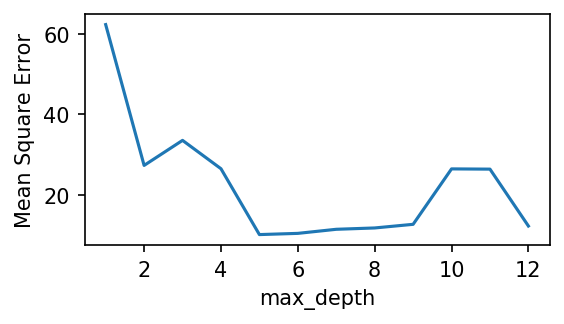

In [18]:
# Setup a loop to iterate though the max_depth and perform a model evaluation for 
# each possible max_depth
#
mse_lst = [] # Empty list
#
for md in max_depths:
    regressor = tree.DecisionTreeRegressor(max_depth=md, random_state = 42)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = round(mean_squared_error(y_test, y_pred),2)
    #print(mse)
    mse_lst.append(mse)
# Plot the max_depth vs. mse for the entire search space
plt.figure(figsize=(4,2), dpi=150)
plt.plot(max_depths,mse_lst)
plt.xlabel("max_depth")
plt.ylabel("Mean Square Error")
plt.show()

In [12]:
# Let's choose 5
md = 5 # max_depth
regressor = tree.DecisionTreeRegressor(max_depth = md, random_state = 42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred),2)
print(mse)

10.26


In [14]:
# This is a BIG TREE!
text_representation = tree.export_text(regressor,feature_names = list(X.columns),show_weights = True)
print(text_representation)

|--- LSTAT <= 7.87
|   |--- RM <= 7.44
|   |   |--- DIS <= 1.48
|   |   |   |--- value: [50.00]
|   |   |--- DIS >  1.48
|   |   |   |--- RM <= 6.80
|   |   |   |   |--- RM <= 6.54
|   |   |   |   |   |--- value: [23.73]
|   |   |   |   |--- RM >  6.54
|   |   |   |   |   |--- value: [27.17]
|   |   |   |--- RM >  6.80
|   |   |   |   |--- LSTAT <= 5.44
|   |   |   |   |   |--- value: [33.83]
|   |   |   |   |--- LSTAT >  5.44
|   |   |   |   |   |--- value: [30.45]
|   |--- RM >  7.44
|   |   |--- RAD <= 16.00
|   |   |   |--- PTRATIO <= 17.90
|   |   |   |   |--- RM <= 7.78
|   |   |   |   |   |--- value: [43.57]
|   |   |   |   |--- RM >  7.78
|   |   |   |   |   |--- value: [47.23]
|   |   |   |--- PTRATIO >  17.90
|   |   |   |   |--- AGE <= 44.35
|   |   |   |   |   |--- value: [43.30]
|   |   |   |   |--- AGE >  44.35
|   |   |   |   |   |--- value: [36.95]
|   |   |--- RAD >  16.00
|   |   |   |--- value: [21.90]
|--- LSTAT >  7.87
|   |--- LSTAT <= 15.00
|   |   |--- DIS <= 1.

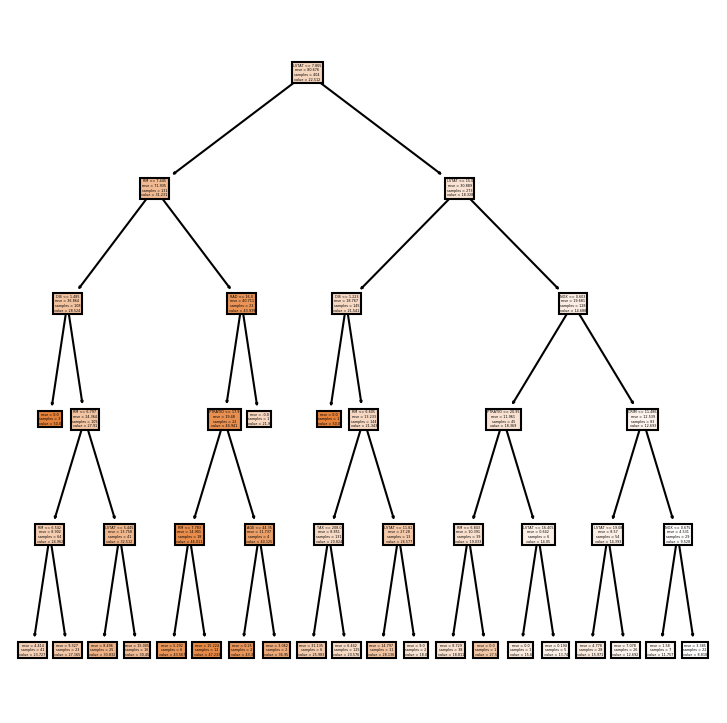

In [15]:
# Visualize the tree
plt.figure(figsize=(6,6), dpi=150)
tree.plot_tree(regressor, feature_names=X.columns,filled=True)
plt.show()

In [16]:
# Predict new homes
#
# Recall the Features: 
#   ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'LSTAT']
#
h1 = [2.14918, 0.0, 19.58, 0.0, 0.871, 5., 98.5, 1.6232, 5.0, 403.0, 14.7, 25.79]
h2 = [3.8497, 2.0, 18.1, 1.0, 0.77, 6., 91.0, 2.5052, 24.0, 666.0, 20.2, 13.27]
h3 = [6.53876, 0.0, 18.1, 1.0, 0.631, 4., 97.5, 1.2024, 24.0, 666.0, 20.2, 30.96]
h4 = [0.16902, 4.0, 25.65, 0.0, 0.581, 5., 88.4, 1.9929, 2.0, 188.0, 10.1, 4.81]
h5 = [8.20058, 0.0, 18.1, 0.0, 0.413, 5., 80.3, 2.7792, 24.0, 666.0, 20.2, 15.94]
#
h_lst = [h1, h2, h3, h4, h5]
#
for house in h_lst:
    print('House features:', house)
    df = pd.DataFrame(data=house)
    pv = round(regressor.predict(df.T).item(),3)
    print('Predicted Value in thousands of dollars:', pv , '\n')

House features: [2.14918, 0.0, 19.58, 0.0, 0.871, 5.0, 98.5, 1.6232, 5.0, 403.0, 14.7, 25.79]
Predicted Value in thousands of dollars: 12.692 

House features: [3.8497, 2.0, 18.1, 1.0, 0.77, 6.0, 91.0, 2.5052, 24.0, 666.0, 20.2, 13.27]
Predicted Value in thousands of dollars: 20.576 

House features: [6.53876, 0.0, 18.1, 1.0, 0.631, 4.0, 97.5, 1.2024, 24.0, 666.0, 20.2, 30.96]
Predicted Value in thousands of dollars: 12.692 

House features: [0.16902, 4.0, 25.65, 0.0, 0.581, 5.0, 88.4, 1.9929, 2.0, 188.0, 10.1, 4.81]
Predicted Value in thousands of dollars: 23.727 

House features: [8.20058, 0.0, 18.1, 0.0, 0.413, 5.0, 80.3, 2.7792, 24.0, 666.0, 20.2, 15.94]
Predicted Value in thousands of dollars: 18.811 

